In [1]:
import healpy as hp
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize
#import pandas as pd

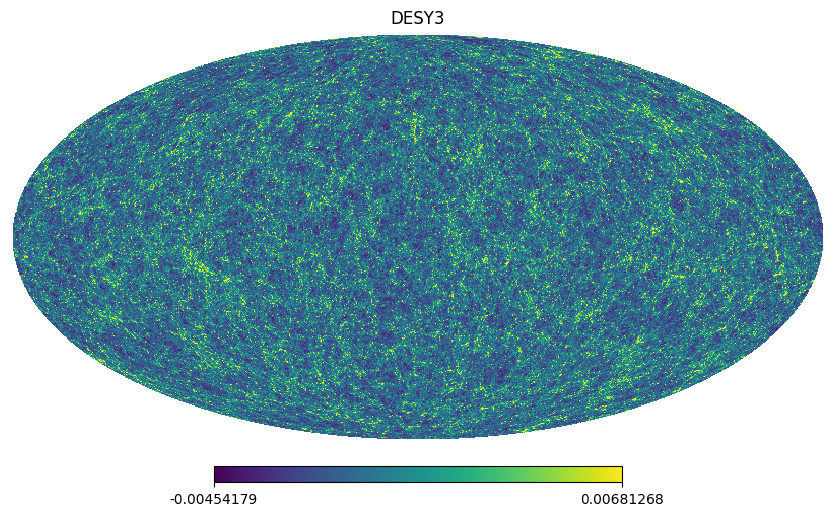

In [2]:
# number of grids
n_side = 256
n_pix = hp.nside2npix(n_side)  # pixel size

n_side = 256  # number of grids
n_pix = hp.nside2npix(n_side)  # pixel size

'''
def array_maker(filename):
    with open(filename, 'r') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        array_use = np.fromfile(f, dtype="float", count=12 * n_side)

    return array_use
'''

file_des = "desy3_bin0_nside256.npy"
# healpix_map = hp.read_map('desy3_bin0_nside256.npy')
healpix_map = np.load(file_des)
#healpix_map_flat = healpix_map.flatten()
#healpix_map = healpix_map_flat.dropna()
healpix_STD = np.std(healpix_map)
healpix_max = 3 * healpix_STD
healpix_min=-2. * healpix_STD
hp.visufunc.mollview(healpix_map, max=healpix_max, min=healpix_min, title='DESY3', cmap='viridis')

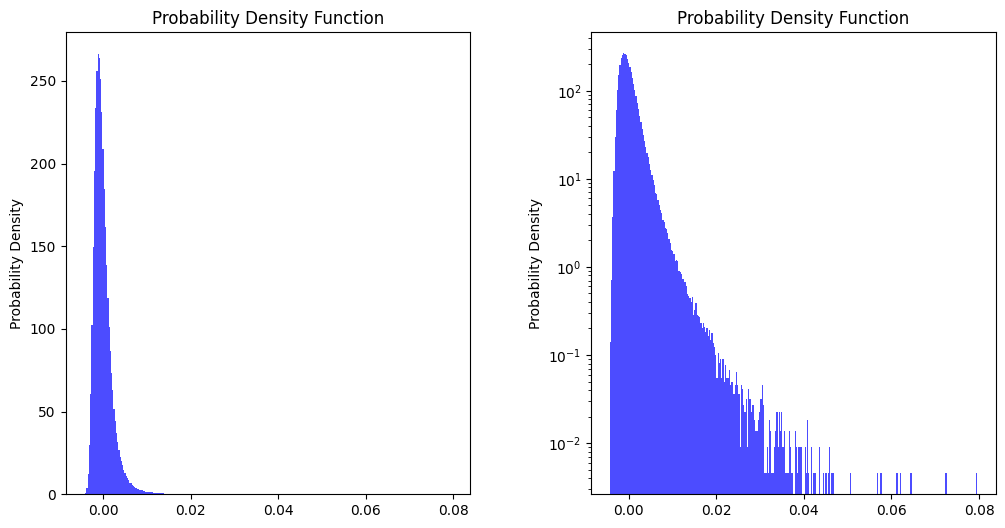

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

def pdf_maker(kappa, title, log_yes_no):
    # Make a histogram to make the PDF
    hist, bin_edges = np.histogram(kappa, bins=300, density=True)
    # density=True gives pdf, else histogram

    # Get the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plot the PDF using the histogram
    plt.plot(bin_centers, hist, label='PDF')

    if (log_yes_no == 'log_yes'):
        plt.yscale('log')

    plt.xlabel('kappa values')
    plt.ylabel('Probability Density')
    plt.title('Probability Density Function')
    plt.legend(title)


def pdf_log_pdf_maker(array_to_use, title, log_yes_no):

    axes[0].hist(array_to_use, bins=300, density=True, alpha=0.7, color='blue', label='PDF')
    axes[0].set_ylabel('Probability Density')
    axes[0].set_title('Probability Density Function')
    axes[0].set_label(title)
    
    axes[1].hist(array_to_use, bins=300, density=True, alpha=0.7, color='blue', label='PDF')
    axes[1].set_ylabel('Probability Density')
    axes[1].set_title('Probability Density Function')
    axes[1].set_label(title)
    axes[1].set_yscale('log')
    
    plt.subplots_adjust(wspace=0.3)


def main():
    pdf_log_pdf_maker(healpix_map, 'DESY3', 'log_no')
    plt.show()


main()

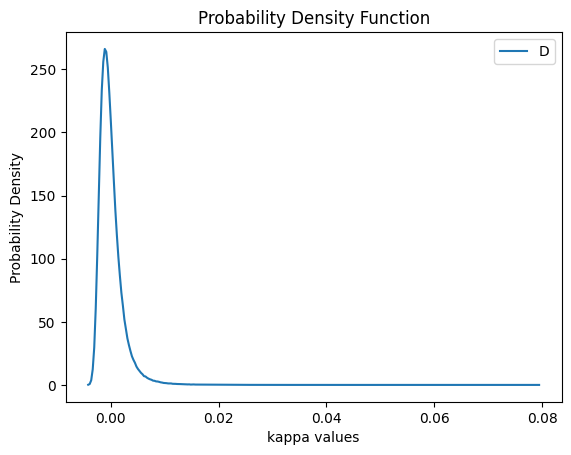

In [4]:
pdf_maker(healpix_map, 'DESY3', 'log_no')

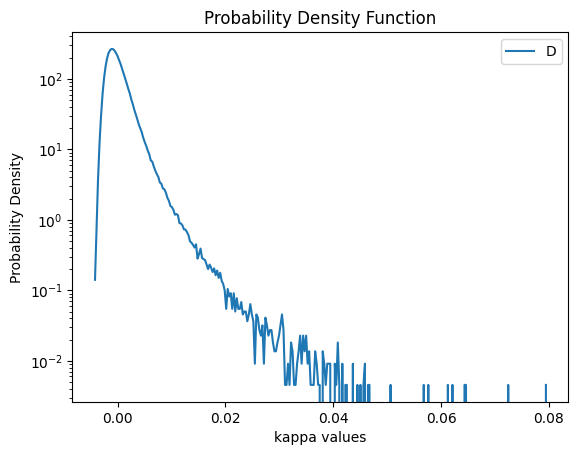

In [5]:
pdf_maker(healpix_map, 'DESY3', 'log_yes')

In [6]:
def objective_function(params, y):
    std_dev, shift = params
    if shift < -HEALPIX_MIN:
        return np.inf

    mean = math.log(shift) - (std_dev ** 2) / 2  # for Kappa Maps
    x = np.log(y + shift)
    least_error = np.sum(((math.log(std_dev ** 2)) / 2) + x + ((x - mean) ** 2) / (2 * (std_dev ** 2)))
    return least_error

HEALPIX_MIN = healpix_map.min()
initial_variance_healpix = healpix_map.var()
initial_shift = -1.5 * HEALPIX_MIN
initial_std_dev_y = math.sqrt(math.log(1 + initial_variance_healpix/initial_shift ** 2))
initial_mean = healpix_map.mean()
initial_guess = np.array([initial_std_dev_y, initial_shift])
print("HEALPIX_MIN: %2.5f" % HEALPIX_MIN)
print("Initial Mean: %2.5f" % initial_mean)
print("Initial Shift %2.5f" % initial_shift)

result = minimize(objective_function, initial_guess, args=(healpix_map,))
optimized_std_dev, optimized_shift = result.x
optimized_mean = math.log(optimized_shift) - (optimized_std_dev ** 2) / 2

print("Optimized Mean:", optimized_mean)
print("Optimized Standard Deviation:", optimized_std_dev)
print("Optimized Shift:", optimized_shift)

HEALPIX_MIN: -0.00434
Initial Mean: 0.00000
Initial Shift 0.00650


/home/namit28/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/namit28/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/namit28/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Optimized Mean: -5.525510929250059
Optimized Standard Deviation: 0.44683450716403084
Optimized Shift: 0.0044020700144727426


/tmp/ipykernel_471/1669190708.py:13: RuntimeWarning: invalid value encountered in log
  x = np.log(y + optimized_shift)


Text(0.5, 0, 'Healpix Values')

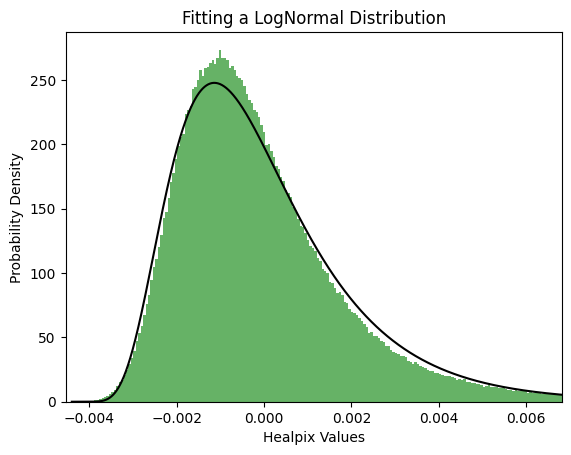

In [7]:
plt.hist(healpix_map, bins=1500, density=True, alpha=0.6, color='g', label='Original Data')
plt.title('Fitting a LogNormal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')


# Plot the fitted normal distribution
ymin = -2 * healpix_map.std()
ymax = 3 * healpix_map.std()
plt.xlim(ymin, ymax)
# plt.ylim(1e-10, 1e+2)
y = np.linspace(ymin, ymax, 10000)
x = np.log(y + optimized_shift)
P_x = np.exp(- ((x - optimized_mean) ** 2 / (2 * optimized_std_dev ** 2))) / math.sqrt(2 * math.pi * optimized_std_dev ** 2)
P_y = P_x * (1/(y+optimized_shift))

plt.plot(y, P_y, color='black', label='Fitted LogNormal Distribution')
plt.ylabel("Probability Density")
plt.xlabel("Healpix Values")

/tmp/ipykernel_471/33582087.py:13: RuntimeWarning: invalid value encountered in log
  x = np.log(y + new_shift)


Text(0.5, 0, 'Healpix Values')

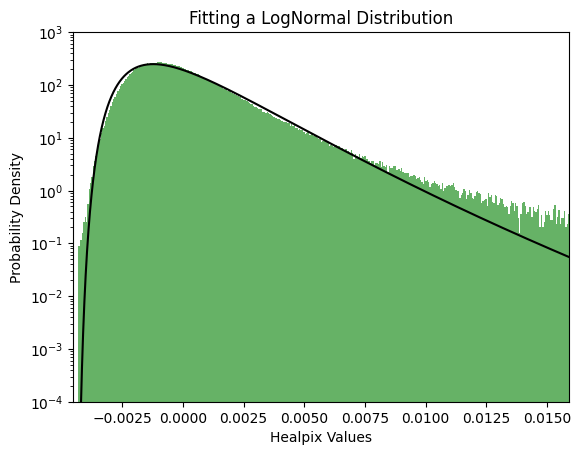

In [12]:
plt.hist(healpix_map, bins=1500, density=True, alpha=0.6, color='g', label='Original Data')
plt.title('Fitting a LogNormal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

ymin = -2 * healpix_map.std()
ymax = 7 * healpix_map.std()
plt.xlim(ymin, ymax)
# plt.ylim(1e-10, 1e+2)
y = np.linspace(ymin, ymax, 10000)
epsilon = 0.02
new_shift = (1 + epsilon) * optimized_shift
x = np.log(y + new_shift)
P_x = np.exp(- ((x - optimized_mean) ** 2 / (2 * optimized_std_dev ** 2))) / math.sqrt(2 * math.pi * optimized_std_dev ** 2)
P_y = P_x * (1/(y + new_shift))
plt.ylim(1e-4, 1e+3)
plt.plot(y, P_y, color='black', label='Fitted LogNormal Distribution')
plt.yscale('log')
plt.ylabel("Probability Density")
plt.xlabel("Healpix Values")